In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

train_ds, val_ds = image_dataset_from_directory(
    "/kaggle/input/real-and-fake-face-detection/real_and_fake_face",
    validation_split=0.2,
    subset="both",
    label_mode = "binary",
    seed=123,
    image_size=(600,600))

Found 2041 files belonging to 2 classes.
Using 1633 files for training.
Using 408 files for validation.


In [13]:
type(val_ds)

tensorflow.python.data.ops.batch_op._BatchDataset

In [19]:
from tensorflow.keras.metrics import Recall, Precision

metrics = [
    Recall(name='recall'),
    Precision(name='precision'),
    'accuracy']

In [23]:
from tensorflow.keras import models, Sequential, layers, regularizers
from tensorflow.keras.losses import BinaryCrossentropy

model = models.Sequential()

model.add(layers.Rescaling(1/255, input_shape=(600,600,3)))
model.add(layers.Conv2D(8, kernel_size = (4,4), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(16, kernel_size = (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, kernel_size = (2,2), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(rate=0.2))  
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.2))  
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=metrics)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 50, restore_best_weights = True, monitor = 'val_loss')

history = model.fit(train_ds,
          validation_data = val_ds,
          batch_size = 32,
          epochs = 1000,
          callbacks = es)

Epoch 1/1000
52/52 [==============================] - 23s 381ms/step - loss: 0.5603 - recall: 0.7773 - precision: 0.7119 - accuracy: 0.7134 - val_loss: 0.7143 - val_recall: 0.8857 - val_precision: 0.5776 - val_accuracy: 0.6078
Epoch 2/1000
52/52 [==============================] - 22s 387ms/step - loss: 0.5086 - recall: 0.8358 - precision: 0.7406 - accuracy: 0.7563 - val_loss: 0.7278 - val_recall: 0.7000 - val_precision: 0.6000 - val_accuracy: 0.6054
Epoch 3/1000
52/52 [==============================] - 22s 384ms/step - loss: 0.4230 - recall: 0.8703 - precision: 0.7921 - accuracy: 0.8089 - val_loss: 0.7235 - val_recall: 0.7619 - val_precision: 0.5993 - val_accuracy: 0.6152
Epoch 4/1000
52/52 [==============================] - 21s 371ms/step - loss: 0.3519 - recall: 0.9093 - precision: 0.8241 - accuracy: 0.8481 - val_loss: 1.0039 - val_recall: 0.5762 - val_precision: 0.6020 - val_accuracy: 0.5858
Epoch 5/1000
52/52 [==============================] - 22s 388ms/step - loss: 0.2934 - recall

In [26]:
import matplotlib.pyplot as plt
def plot_loss_precision_recall_curve(history):
    
    fig, ax =plt.subplots(1,3,figsize=(20,5))
    
    # --- LOSS
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Val'], loc='upper right')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- RECALL
    ax[1].plot(history.history['recall'])
    ax[1].plot(history.history['val_recall'])
    ax[1].set_title('Model recall', fontsize = 18)
    ax[1].set_xlabel('Epoch', fontsize = 14)
    ax[1].set_ylabel('Recall', fontsize = 14)
    ax[1].legend(['Train', 'Val'], loc='lower right') 
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    # --- PRECISION
    
    
    ax[2].plot(history.history['precision'])
    ax[2].plot(history.history['val_precision'])
    ax[2].set_title('Model precision', fontsize = 18)
    ax[2].set_xlabel('Epoch', fontsize = 14)
    ax[2].set_ylabel('Precision', fontsize = 14)
    ax[2].legend(['Train', 'Val'], loc='lower right')  
    ax[2].grid(axis="x",linewidth=0.5)
    ax[2].grid(axis="y",linewidth=0.5)    
    
    plt.show()


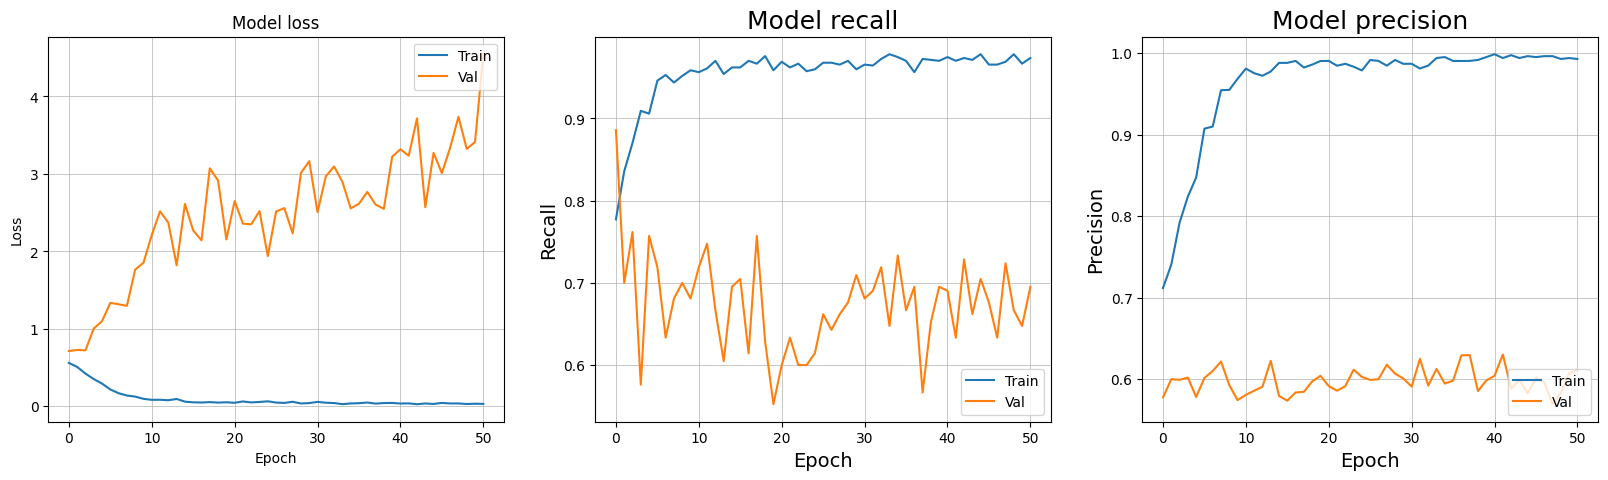

In [29]:
plot_loss_precision_recall_curve(history)

In [30]:
model.evaluate(val_ds)

13/13 [==============================] - 4s 305ms/step - loss: 0.7143 - recall: 0.8857 - precision: 0.5776 - accuracy: 0.6078


[0.7143487930297852,
 0.8857142925262451,
 0.5776397585868835,
 0.6078431606292725]